In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
x = np.linspace(0, 10, 11)
a = sps.norm.cdf(x, 4, 3)
u = sps.norm.pdf(x, 4, 3)
p = .7

In [3]:
m = a - a[:, None]

m_p = m >= p

l, h = m_p.nonzero()
d = h - l
b = d.argmin()
bL = l[b]
bH = h[b]

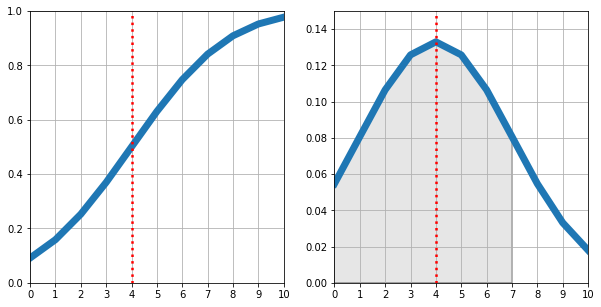

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(a, lw=7); ax[1].plot(u, lw=7)
ax[0].grid(); ax[1].grid()
ax[0].set_xlim(0, 10); ax[0].set_ylim(0, 1);
ax[1].set_xlim(0, 10); ax[1].set_ylim(0, .15)
ax[0].axvline(4, ls=":", c="r", lw=2.5)
ax[1].axvline(4, ls=":", c="r", lw=2.5)
verts = [
    (0, 0),
    *zip(x[bL:bH+1], u[bL:bH+1]),
    (bH, 0)
]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax[1].add_patch(poly)
ax[0].set_xticks(np.arange(0, 11, 1))
ax[1].set_xticks(np.arange(0, 11, 1));

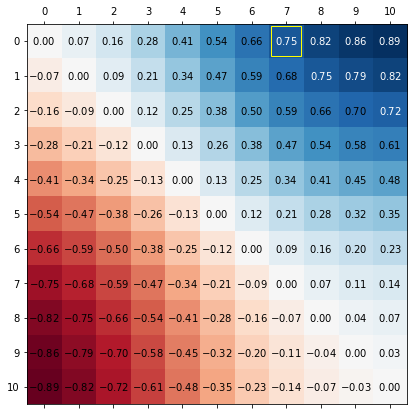

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.matshow(m, cmap="RdBu")
for col in pd.DataFrame(m).columns:
    for row in pd.DataFrame(m).index:
        ax.text(
            row, col,
            f"${m[col,row]:.2f}$",
            ha="center", va="center",
            color="k" if m[col,row] < p else "w",
            fontsize="medium"
        )
ax.plot(bH, bL, marker="s", markersize=30, fillstyle="none", color="yellow")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1));